In [1]:
import time
start = time.time()

# Importing all the required packages for the project.

In [2]:
import os
import warnings
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.python.keras import layers
from tensorflow.python.keras import layers, regularizers
from keras.layers import Dense
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.linear_model import RidgeClassifier

# Downloading the latest updated dataset from the source.

In [3]:
# Function definition to retrieve the dataset:
def checkLatestVersion():
    if(os.path.exists("dly532.csv")):
        os.remove("dly532.csv")
        print("Deleted previous CSV file.")
        print("Downloading latest CSV file.")
        os.system("wget --no-check-certificate https://cli.fusio.net/cli/climate_data/webdata/dly532.csv")
        print("Downloaded dataset.")
    else:
        print("Downloading dataset.")
        os.system("wget --no-check-certificate https://cli.fusio.net/cli/climate_data/webdata/dly532.csv")
        print("Downloaded dataset.")
    return None

In [4]:
# Function call defined.
checkLatestVersion()

Deleted previous CSV file.
Downloaded dataset.


In [5]:
# Updating the CSV file with newly downloaded dataset.
with open("dly532.csv", "r") as reading:
    data = reading.read().splitlines(True)
reading.close()
os.remove("dly532.csv")
with open("dly532.csv", "w") as writing:
    writing.writelines(data[26:])
writing.close()

# Reading the raw dataset

Adding Column names to the dataset and assigning it to a dataframe named read_data.

In [6]:
names = ["DATE", "INDICATOR0","MAX_AIR_TEMP",
           "INDICATOR1","MIN_AIR_TEMP","I_GRASS_MIN_TEMP",
           "GRASS_MIN_TEMP","INDICATOR2","RAIN_MM",
           "MEAN_CBL_PRESSURE","MEAN_WINDSPEED_KNOT","INDICATOR3",
           "HIGHEST_10MIN_WINDSPEED","INDICATOR4","WIND_DIR_DEGREE",
           "INDICATOR5","HIGHEST_GUST","SUN_DURATION","DOS",
           "GLOBAL_RADIATION","SOIL_TEMP","POTENTIAL_EVAPOTRANSPIRATION",
           "EVAPORATION","SMD_WELL_DRAINED","SMD_MODERATELY_DRAINED","SMD_POORLY_DRAINED"]
read_data = pd.read_csv("dly532.csv", names = names)
read_data

,DATE,INDICATOR0,MAX_AIR_TEMP,INDICATOR1,MIN_AIR_TEMP,I_GRASS_MIN_TEMP,GRASS_MIN_TEMP,INDICATOR2,RAIN_MM,MEAN_CBL_PRESSURE,...,HIGHEST_GUST,SUN_DURATION,DOS,GLOBAL_RADIATION,SOIL_TEMP,POTENTIAL_EVAPOTRANSPIRATION,EVAPORATION,SMD_WELL_DRAINED,SMD_MODERATELY_DRAINED,SMD_POORLY_DRAINED
0,01-jan-1942,0,9.7,0,6.8,0,4.7,2,0.0,1020.3,...,,0.0,0,,,1.1,1.4,,,
1,02-jan-1942,0,9.9,0,7.9,0,6.7,0,0.1,1016.2,...,,0.0,0,,,0.7,0.9,,,
2,03-jan-1942,0,11.2,0,8.9,0,7.2,0,1.5,1006.8,...,,0.1,0,,,0.5,0.6,,,
3,04-jan-1942,0,9.2,0,2.7,0,3.4,0,3.5,1001.5,...,,0.6,0,,,0.6,0.7,,,
4,05-jan-1942,0,3.5,1,-0.8,0,0.0,0,0.6,1013.4,...,,3.4,0,,,0.6,0.7,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28819,26-nov-2020,0,7.5,0,1.3,0,1.1,3,0.0,1011.1,...,14,0.0,0,203,5.375,0.2,0.3,0.4,0.4,-8.6
28820,27-nov-2020,0,7.9,1,-1.2,1,-5.5,0,0.2,1008.2,...,12,4.7,0,345,4.975,0.1,0.2,0.3,0.3,-8.3
28821,28-nov-2020,0,10.2,0,0.6,1,-3.7,3,0.0,1008.3,...,15,0.6,0,222,4.800,0.3,0.4,0.6,0.6,-7.6
28822,29-nov-2020,0,10.8,0,1.9,1,-0.8,3,0.0,1015.1,...,14,1.9,0,198,6.650,0.2,0.3,0.8,0.8,-7.0


# Pre-processing the data.

Removing empty values, the old rows(till 28-oct-1979)and irrelevant data. 

In [7]:
read_data = pd.read_csv("dly532.csv", names = names)
read_data = read_data.replace(r'^\s*$', np.nan, regex=True)
read_data = read_data[read_data["SMD_POORLY_DRAINED"].notna()]
read_data

,DATE,INDICATOR0,MAX_AIR_TEMP,INDICATOR1,MIN_AIR_TEMP,I_GRASS_MIN_TEMP,GRASS_MIN_TEMP,INDICATOR2,RAIN_MM,MEAN_CBL_PRESSURE,...,HIGHEST_GUST,SUN_DURATION,DOS,GLOBAL_RADIATION,SOIL_TEMP,POTENTIAL_EVAPOTRANSPIRATION,EVAPORATION,SMD_WELL_DRAINED,SMD_MODERATELY_DRAINED,SMD_POORLY_DRAINED
13814,28-oct-1979,0,12.0,0,4.5,1,-1.9,0,0.9,997.9,...,22,4.2,0,573,9.350,0.7,0.9,0.0,-0.2,-0.2
13815,29-oct-1979,0,11.0,0,4.0,0,2.7,0,0.7,998.8,...,17,0.4,0,417,8.625,0.6,0.8,0.0,-0.1,-0.3
13816,30-oct-1979,0,15.7,0,8.8,0,7.4,0,4.8,990.8,...,36,0.6,0,247,10.550,0.8,1.0,0.0,-4.0,-4.4
13817,31-oct-1979,0,12.6,0,7.1,0,5.3,0,0.5,990.0,...,37,6.7,0,577,9.875,1.0,1.2,0.5,0.5,-3.7
13818,01-nov-1979,0,11.4,0,5.5,0,4.0,2,0.0,1001.6,...,27,7.0,0,585,8.175,1.2,1.5,1.6,1.6,-2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28819,26-nov-2020,0,7.5,0,1.3,0,1.1,3,0.0,1011.1,...,14,0.0,0,203,5.375,0.2,0.3,0.4,0.4,-8.6
28820,27-nov-2020,0,7.9,1,-1.2,1,-5.5,0,0.2,1008.2,...,12,4.7,0,345,4.975,0.1,0.2,0.3,0.3,-8.3
28821,28-nov-2020,0,10.2,0,0.6,1,-3.7,3,0.0,1008.3,...,15,0.6,0,222,4.800,0.3,0.4,0.6,0.6,-7.6
28822,29-nov-2020,0,10.8,0,1.9,1,-0.8,3,0.0,1015.1,...,14,1.9,0,198,6.650,0.2,0.3,0.8,0.8,-7.0


Checking the data types of each column.

In [8]:
read_data.dtypes

DATE                             object
INDICATOR0                        int64
MAX_AIR_TEMP                    float64
INDICATOR1                        int64
MIN_AIR_TEMP                    float64
I_GRASS_MIN_TEMP                  int64
GRASS_MIN_TEMP                   object
INDICATOR2                        int64
RAIN_MM                         float64
MEAN_CBL_PRESSURE               float64
MEAN_WINDSPEED_KNOT             float64
INDICATOR3                        int64
HIGHEST_10MIN_WINDSPEED          object
INDICATOR4                        int64
WIND_DIR_DEGREE                  object
INDICATOR5                        int64
HIGHEST_GUST                     object
SUN_DURATION                    float64
DOS                              object
GLOBAL_RADIATION                 object
SOIL_TEMP                        object
POTENTIAL_EVAPOTRANSPIRATION    float64
EVAPORATION                      object
SMD_WELL_DRAINED                 object
SMD_MODERATELY_DRAINED           object


### Converting object to float data types

Except Date column all other columns containing object type are converted into float.

In [9]:
read_data['HIGHEST_10MIN_WINDSPEED'] = read_data['HIGHEST_10MIN_WINDSPEED'].astype(float)
read_data['WIND_DIR_DEGREE'] = read_data['WIND_DIR_DEGREE'].astype(float)
read_data['HIGHEST_GUST'] = read_data['HIGHEST_GUST'].astype(float)
read_data['GRASS_MIN_TEMP'] = read_data['GRASS_MIN_TEMP'].astype(float)
read_data['EVAPORATION'] = read_data['EVAPORATION'].astype(float)
read_data['DOS'] = read_data['DOS'].astype(float)
read_data['GLOBAL_RADIATION'] = read_data['GLOBAL_RADIATION'].astype(float)
read_data['SOIL_TEMP'] = read_data['SOIL_TEMP'].astype(float)
read_data['SMD_WELL_DRAINED'] = read_data['SMD_WELL_DRAINED'].astype(float)
read_data['SMD_MODERATELY_DRAINED'] = read_data['SMD_MODERATELY_DRAINED'].astype(float)
read_data['SMD_POORLY_DRAINED'] = read_data['SMD_POORLY_DRAINED'].astype(float)
print(read_data.dtypes)

DATE                             object
INDICATOR0                        int64
MAX_AIR_TEMP                    float64
INDICATOR1                        int64
MIN_AIR_TEMP                    float64
I_GRASS_MIN_TEMP                  int64
GRASS_MIN_TEMP                  float64
INDICATOR2                        int64
RAIN_MM                         float64
MEAN_CBL_PRESSURE               float64
MEAN_WINDSPEED_KNOT             float64
INDICATOR3                        int64
HIGHEST_10MIN_WINDSPEED         float64
INDICATOR4                        int64
WIND_DIR_DEGREE                 float64
INDICATOR5                        int64
HIGHEST_GUST                    float64
SUN_DURATION                    float64
DOS                             float64
GLOBAL_RADIATION                float64
SOIL_TEMP                       float64
POTENTIAL_EVAPOTRANSPIRATION    float64
EVAPORATION                     float64
SMD_WELL_DRAINED                float64
SMD_MODERATELY_DRAINED          float64


# Removing Columns which are not relevant.

The following columns are removed because these columns are poorly correlated to the target column [RAIN_MM]

In [10]:
read_data = read_data.drop(columns = ["I_GRASS_MIN_TEMP","GRASS_MIN_TEMP",
                                      "INDICATOR2","GLOBAL_RADIATION","DOS",
                                      "SOIL_TEMP","INDICATOR0","INDICATOR1",
                                      "INDICATOR2","INDICATOR3","INDICATOR4",
                                      "INDICATOR5","MEAN_CBL_PRESSURE",
                                      "SMD_WELL_DRAINED","SMD_MODERATELY_DRAINED",
                                      "SMD_POORLY_DRAINED"])
read_data

,DATE,MAX_AIR_TEMP,MIN_AIR_TEMP,RAIN_MM,MEAN_WINDSPEED_KNOT,HIGHEST_10MIN_WINDSPEED,WIND_DIR_DEGREE,HIGHEST_GUST,SUN_DURATION,POTENTIAL_EVAPOTRANSPIRATION,EVAPORATION
13814,28-oct-1979,12.0,4.5,0.9,8.8,16.0,280.0,22.0,4.2,0.7,0.9
13815,29-oct-1979,11.0,4.0,0.7,8.2,12.0,240.0,17.0,0.4,0.6,0.8
13816,30-oct-1979,15.7,8.8,4.8,14.3,24.0,210.0,36.0,0.6,0.8,1.0
13817,31-oct-1979,12.6,7.1,0.5,13.5,24.0,250.0,37.0,6.7,1.0,1.2
13818,01-nov-1979,11.4,5.5,0.0,12.5,19.0,240.0,27.0,7.0,1.2,1.5
...,...,...,...,...,...,...,...,...,...,...,...
28819,26-nov-2020,7.5,1.3,0.0,5.5,10.0,270.0,14.0,0.0,0.2,0.3
28820,27-nov-2020,7.9,-1.2,0.2,3.0,7.0,140.0,12.0,4.7,0.1,0.2
28821,28-nov-2020,10.2,0.6,0.0,6.3,11.0,80.0,15.0,0.6,0.3,0.4
28822,29-nov-2020,10.8,1.9,0.0,4.4,10.0,280.0,14.0,1.9,0.2,0.3


RAW DATA PLOT (X axis : Range of the data column; Y axis : Feature frequency)


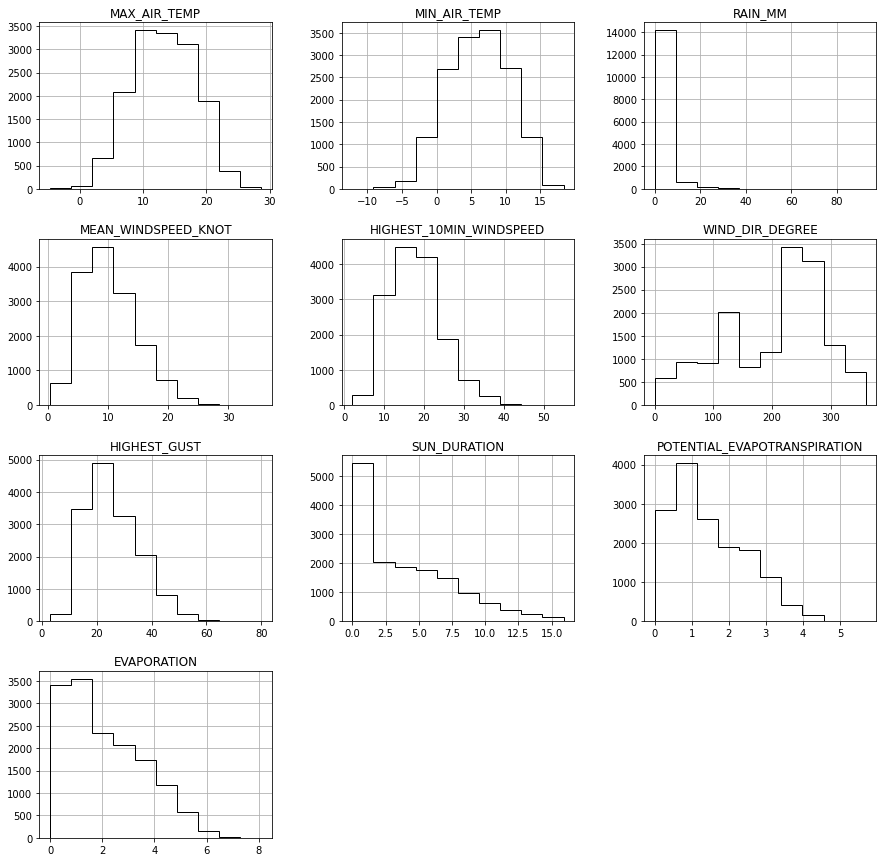

In [11]:
print("RAW DATA PLOT (X axis : Range of the data column; Y axis : Feature frequency)")
read_data.hist(figsize=(15, 15), histtype = "step",label = ["a","a","a","a","a","a","a","a","a","a"], color = "black")
plt.show()

Filling Null values in the dataset with float 0 and checking for columns containing any Null values in it.

In [12]:
read_data = read_data.fillna(read_data.mean())
read_data.isnull().any()

DATE                            False
MAX_AIR_TEMP                    False
MIN_AIR_TEMP                    False
RAIN_MM                         False
MEAN_WINDSPEED_KNOT             False
HIGHEST_10MIN_WINDSPEED         False
WIND_DIR_DEGREE                 False
HIGHEST_GUST                    False
SUN_DURATION                    False
POTENTIAL_EVAPOTRANSPIRATION    False
EVAPORATION                     False
dtype: bool

# Appending a Categorical target column named "RAIN_BOOLEAN".

Building the target column values based upon the RAIN_MM column values.

In [13]:
read_data.loc[read_data["RAIN_MM"] == 0, "RAIN_BOOLEAN"] = 0
read_data.loc[read_data["RAIN_MM"] > 0, "RAIN_BOOLEAN"] =  1

Code to check and plot the distribution of target variable.

[1 1 1 ... 0 0 1]
15010
0 :  6114
1 :  8896


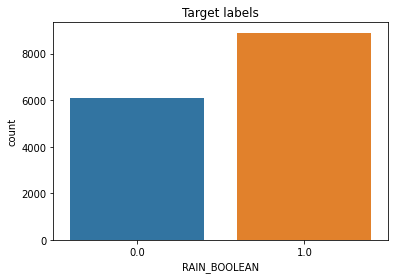

In [14]:
warnings.filterwarnings("ignore")

target_Arr = np.array([int(i) for i in read_data["RAIN_BOOLEAN"]])
print(target_Arr)
print(len(target_Arr))
count = 0
for i in target_Arr:
    if i == 0:
        count+=1
print("0 : ",count)
print("1 : ",len(target_Arr)-count)
sns.countplot(read_data.RAIN_BOOLEAN)
plt.title("Target labels")
plt.show()

Removing column RAIN_MM, DATE, RAIN_BOOLEAN for ease, Since we are not going to make use of them further for training.

In [15]:
read_data = read_data.drop(columns = ["RAIN_MM","DATE","RAIN_BOOLEAN"])
read_data

,MAX_AIR_TEMP,MIN_AIR_TEMP,MEAN_WINDSPEED_KNOT,HIGHEST_10MIN_WINDSPEED,WIND_DIR_DEGREE,HIGHEST_GUST,SUN_DURATION,POTENTIAL_EVAPOTRANSPIRATION,EVAPORATION
13814,12.0,4.5,8.8,16.0,280.0,22.0,4.2,0.7,0.9
13815,11.0,4.0,8.2,12.0,240.0,17.0,0.4,0.6,0.8
13816,15.7,8.8,14.3,24.0,210.0,36.0,0.6,0.8,1.0
13817,12.6,7.1,13.5,24.0,250.0,37.0,6.7,1.0,1.2
13818,11.4,5.5,12.5,19.0,240.0,27.0,7.0,1.2,1.5
...,...,...,...,...,...,...,...,...,...
28819,7.5,1.3,5.5,10.0,270.0,14.0,0.0,0.2,0.3
28820,7.9,-1.2,3.0,7.0,140.0,12.0,4.7,0.1,0.2
28821,10.2,0.6,6.3,11.0,80.0,15.0,0.6,0.3,0.4
28822,10.8,1.9,4.4,10.0,280.0,14.0,1.9,0.2,0.3


### Reading Final Features of Dataset

# Normalizing Dataset.

In [16]:
# Min-max normalization
def Min_Max_Normalization(dataframe):
    dataframe=(dataframe-dataframe.min())/(dataframe.max()-dataframe.min())
    return dataframe

In [17]:
read_data=Min_Max_Normalization(read_data)

# Saving the latest date data separately for purpose of prediction.
read_data_presentDate = read_data.tail(1)

# Removing the latest date data from the dataset.
read_data.drop(read_data.tail(1).index, inplace = True)

norm_training_data = read_data.values
read_data

,MAX_AIR_TEMP,MIN_AIR_TEMP,MEAN_WINDSPEED_KNOT,HIGHEST_10MIN_WINDSPEED,WIND_DIR_DEGREE,HIGHEST_GUST,SUN_DURATION,POTENTIAL_EVAPOTRANSPIRATION,EVAPORATION
13814,0.500000,0.545752,0.239316,0.264151,0.777778,0.246753,0.264151,0.122807,0.111111
13815,0.470060,0.529412,0.222222,0.188679,0.666667,0.181818,0.025157,0.105263,0.098765
13816,0.610778,0.686275,0.396011,0.415094,0.583333,0.428571,0.037736,0.140351,0.123457
13817,0.517964,0.630719,0.373219,0.415094,0.694444,0.441558,0.421384,0.175439,0.148148
13818,0.482036,0.578431,0.344729,0.320755,0.666667,0.311688,0.440252,0.210526,0.185185
...,...,...,...,...,...,...,...,...,...
28818,0.368263,0.500000,0.207977,0.188679,0.750000,0.181818,0.440252,0.035088,0.024691
28819,0.365269,0.441176,0.145299,0.150943,0.750000,0.142857,0.000000,0.035088,0.037037
28820,0.377246,0.359477,0.074074,0.094340,0.388889,0.116883,0.295597,0.017544,0.024691
28821,0.446108,0.418301,0.168091,0.169811,0.222222,0.155844,0.037736,0.052632,0.049383


# Split dataset into training set and test set

In [18]:
#Splitting the original dataset
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(norm_training_data, target_Arr[:-1], test_size=0.2, random_state=42)

#Saving the training dataset into dataframe for p-value evaluation
read_data_train = pd.DataFrame(data=X_train_temp,columns=['MAX_AIR_TEMP', 'MIN_AIR_TEMP', 'MEAN_WINDSPEED_KNOT',
                                                     'HIGHEST_10MIN_WINDSPEED', 'WIND_DIR_DEGREE', 'HIGHEST_GUST',
                                                     'SUN_DURATION', 'POTENTIAL_EVAPOTRANSPIRATION', 'EVAPORATION'])
read_data_train

,MAX_AIR_TEMP,MIN_AIR_TEMP,MEAN_WINDSPEED_KNOT,HIGHEST_10MIN_WINDSPEED,WIND_DIR_DEGREE,HIGHEST_GUST,SUN_DURATION,POTENTIAL_EVAPOTRANSPIRATION,EVAPORATION
0,0.769461,0.790850,0.279202,0.320755,0.583333,0.363636,0.446541,0.403509,0.382716
1,0.634731,0.656863,0.313390,0.320755,0.861111,0.350649,0.528302,0.385965,0.407407
2,0.646707,0.774510,0.128205,0.150943,0.750000,0.142857,0.226415,0.245614,0.234568
3,0.485030,0.513072,0.561254,0.641509,0.666667,0.636364,0.169811,0.245614,0.246914
4,0.482036,0.323529,0.088319,0.113208,0.416667,0.103896,0.421384,0.017544,0.024691
...,...,...,...,...,...,...,...,...,...
12002,0.404192,0.565359,0.678063,0.622642,0.638889,0.597403,0.257862,0.228070,0.222222
12003,0.760479,0.885621,0.199430,0.245283,0.638889,0.207792,0.088050,0.473684,0.432099
12004,0.733533,0.784314,0.182336,0.283019,0.333333,0.259740,0.245283,0.421053,0.419753
12005,0.494012,0.503268,0.301994,0.358491,0.527778,0.454545,0.000000,0.157895,0.148148


# Selecting feature columns based upon P-values.

In [19]:
column_names = list(read_data_train.columns)
p_value_max = 1
while (len(column_names)>0):
    p_values= []
    training_with_ColumnValues_1 = read_data_train[column_names]
    training_with_ColumnValues_1 = sm.add_constant(training_with_ColumnValues_1)
    model = sm.OLS(y_train_temp,training_with_ColumnValues_1.astype(float)).fit()
    p_values = pd.Series(model.pvalues.values[1:],index = column_names)      
    p_value_max = max(p_values)
    feature_with_p_max = p_values.idxmax()
    if(p_value_max>0.05):
        column_names.remove(feature_with_p_max)
    else:
        break
final_features = column_names
print("CHOSEN FEATURES : ", final_features)
print("NUMBER OF FEATURES : ",len(final_features))

CHOSEN FEATURES :  ['MAX_AIR_TEMP', 'MIN_AIR_TEMP', 'MEAN_WINDSPEED_KNOT', 'HIGHEST_10MIN_WINDSPEED', 'WIND_DIR_DEGREE', 'HIGHEST_GUST', 'SUN_DURATION', 'POTENTIAL_EVAPOTRANSPIRATION', 'EVAPORATION']
NUMBER OF FEATURES :  9


No column was dropped as all the column data have p-value less than 0.05.

# Selecting feature columns based upon box plot.

Box plot was plotted with RAIN_BOOLEAN column against all othe feature column.

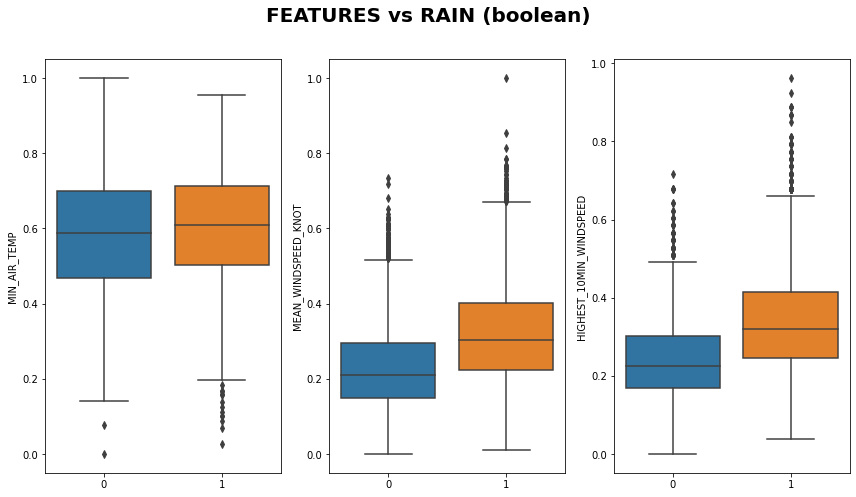

In [20]:
fig = plt.figure(figsize=(12, 7))
plt.xticks(rotation='vertical', fontsize='20')
fig.suptitle('FEATURES vs RAIN (boolean)\n',fontweight ="bold", fontsize='20')

plt.subplot(131)
sns.boxplot(x=y_train_temp, y=read_data_train.MIN_AIR_TEMP)
plt.subplot(132)
sns.boxplot(x=y_train_temp, y=read_data_train.MEAN_WINDSPEED_KNOT)
plt.subplot(133)
sns.boxplot(x=y_train_temp, y=read_data_train.HIGHEST_10MIN_WINDSPEED)
plt.tight_layout()

plt.tight_layout()
plt.show()

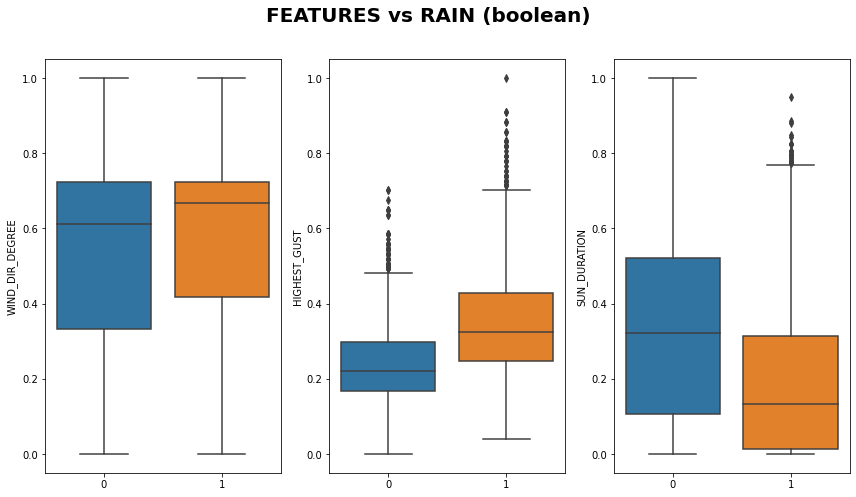

In [21]:
fig = plt.figure(figsize=(12, 7))
plt.xticks(rotation='vertical', fontsize='20')
fig.suptitle('FEATURES vs RAIN (boolean)\n',fontweight ="bold", fontsize='20')

plt.subplot(131)
sns.boxplot(x=y_train_temp, y=read_data_train.WIND_DIR_DEGREE)
plt.subplot(132)
sns.boxplot(x=y_train_temp, y=read_data_train.HIGHEST_GUST)
plt.subplot(133)
sns.boxplot(x=y_train_temp, y=read_data_train.SUN_DURATION)
plt.tight_layout()
plt.show()

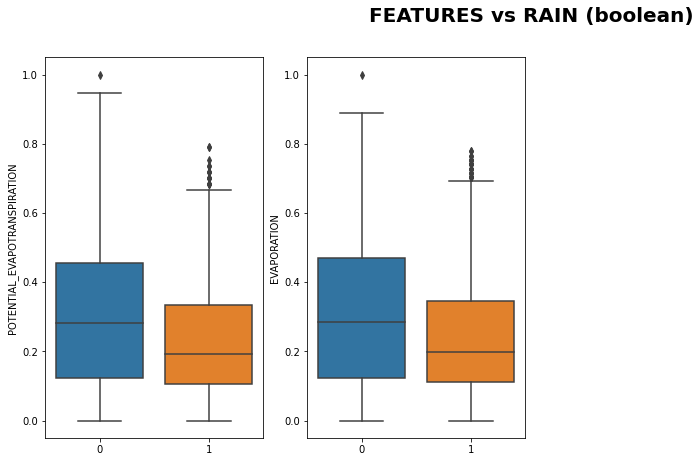

In [22]:
fig = plt.figure(figsize=(18, 7))
plt.xticks(rotation='vertical', fontsize='20')
fig.suptitle('FEATURES vs RAIN (boolean)\n',fontweight ="bold", fontsize='20')
plt.subplot(141)
sns.boxplot(x=y_train_temp, y=read_data_train.POTENTIAL_EVAPOTRANSPIRATION)
plt.subplot(142)
sns.boxplot(x=y_train_temp, y=read_data_train.EVAPORATION)

plt.show()

# Removing columns from the read_data_train based on box plot.

In [23]:
read_data_train = read_data.drop(columns = ["MIN_AIR_TEMP","MAX_AIR_TEMP","POTENTIAL_EVAPOTRANSPIRATION"])
read_data_train

,MEAN_WINDSPEED_KNOT,HIGHEST_10MIN_WINDSPEED,WIND_DIR_DEGREE,HIGHEST_GUST,SUN_DURATION,EVAPORATION
13814,0.239316,0.264151,0.777778,0.246753,0.264151,0.111111
13815,0.222222,0.188679,0.666667,0.181818,0.025157,0.098765
13816,0.396011,0.415094,0.583333,0.428571,0.037736,0.123457
13817,0.373219,0.415094,0.694444,0.441558,0.421384,0.148148
13818,0.344729,0.320755,0.666667,0.311688,0.440252,0.185185
...,...,...,...,...,...,...
28818,0.207977,0.188679,0.750000,0.181818,0.440252,0.024691
28819,0.145299,0.150943,0.750000,0.142857,0.000000,0.037037
28820,0.074074,0.094340,0.388889,0.116883,0.295597,0.024691
28821,0.168091,0.169811,0.222222,0.155844,0.037736,0.049383


In [24]:
read_data = read_data.drop(columns = ["MIN_AIR_TEMP","MAX_AIR_TEMP","POTENTIAL_EVAPOTRANSPIRATION"])
X_train, X_test, y_train, y_test = train_test_split(read_data.values, target_Arr[:-1], test_size=0.2, random_state=42)

read_data_presentDate = read_data_presentDate.drop(columns = ["MIN_AIR_TEMP","MAX_AIR_TEMP","POTENTIAL_EVAPOTRANSPIRATION"])
norm_data_presentDate = read_data_presentDate.values

# Implementation of various machine learning models.

# Baseline Model (predicts class with target value 0 everytime)

ACCURACY OF BASELINE MODEL OVER TESTING DATA :  0.399400399733511


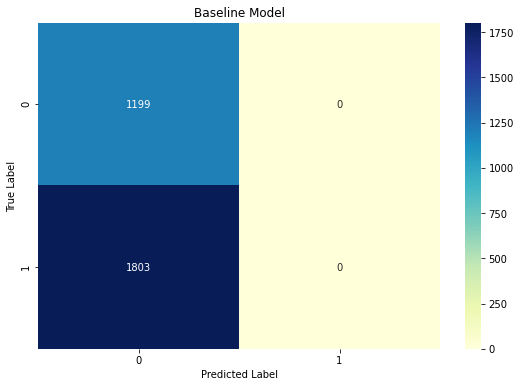

In [25]:
def Baseline_model(y):
    y_pred = y.copy()
    for j in range(len(y_pred)):
        if y_pred[j] == 1:
            y_pred[j] = 0
    return y_pred

y_pred_baseline = Baseline_model(y_test)
accuracy_baseline = metrics.accuracy_score(y_test,y_pred_baseline)
print("ACCURACY OF BASELINE MODEL OVER TESTING DATA : ",accuracy_baseline)

CM = confusion_matrix(y_test, y_pred_baseline)
plt.figure(figsize=(9,6))
cm_matrix = pd.DataFrame(data = CM, columns=[0, 1], 
                                 index=[0, 1])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Baseline Model')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Logistic Regression Model using Cross-validation.

In [26]:
warnings.filterwarnings("ignore")

max_iter_Arr = [50,100,150,200,250,300,350,400,450,500]
f1_score=[]
std_error=[]
mean_accuracy = []
for max_iter_Val in max_iter_Arr:
    kfold_n = 5
    kfold = KFold(n_splits=kfold_n)
    logisticReg = LogisticRegression(penalty="l1",max_iter = 100, solver = "liblinear") #max_iter alteration for different values
    temp=[]
    temp_acc = []
    for train, test in kfold.split(X_train):
        logisticReg.fit(X_train[train], y_train[train])
        ypred = logisticReg.predict(X_train[test])
        temp_acc.append(accuracy_score(y_train[test],ypred))
        ypred = logisticReg.predict(X_train)
    mean_accuracy.append(np.array(temp_acc).mean())
    scores = cross_val_score(logisticReg,X_train[train],y_train[train], cv=5, scoring='f1')
    f1_score.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())
    print("max_iter Value :",max_iter_Val)
    print("LOGISTIC REGRESSION MEAN ACCURACY FOR MAX_ITER=%d USING 10-FOLD CROSSVALIDATION OVER TESTING DATA: "%max_iter_Val,mean_accuracy[-1])
    print("MEAN OF THE F1-SCORES :",f1_score[-1])
    print("STANDARD DEVIATION OF F1-SCORE :",std_error[-1],"\n")

max_iter Value : 50
LOGISTIC REGRESSION MEAN ACCURACY FOR MAX_ITER=50 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.7274083689109554
MEAN OF THE F1-SCORES : 0.7836700316635612
STANDARD DEVIATION OF F1-SCORE : 0.005007631845274263 

max_iter Value : 100
LOGISTIC REGRESSION MEAN ACCURACY FOR MAX_ITER=100 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.7273251049642444
MEAN OF THE F1-SCORES : 0.7836700316635612
STANDARD DEVIATION OF F1-SCORE : 0.005007631845274263 

max_iter Value : 150
LOGISTIC REGRESSION MEAN ACCURACY FOR MAX_ITER=150 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.7273250702853827
MEAN OF THE F1-SCORES : 0.783569899597485
STANDARD DEVIATION OF F1-SCORE : 0.005027101169164305 

max_iter Value : 200
LOGISTIC REGRESSION MEAN ACCURACY FOR MAX_ITER=200 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.7274083689109554
MEAN OF THE F1-SCORES : 0.783771687479207
STANDARD DEVIATION OF F1-SCORE : 0.004953542157491176 

max_iter Value : 250
LOGISTIC REGRESSION MEA

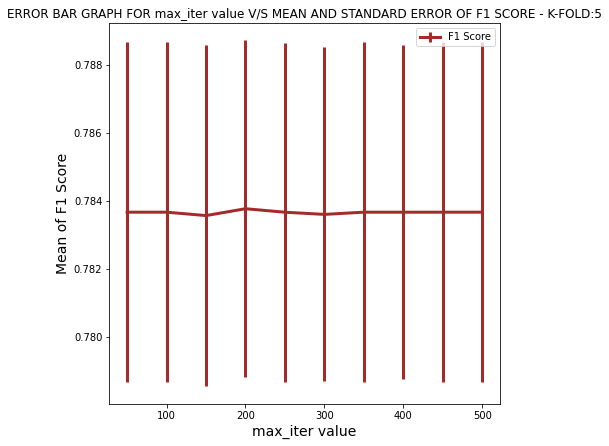

In [27]:
plt.figure(figsize=(7,7))
plt.errorbar(max_iter_Arr,f1_score,yerr=std_error,linewidth=3, color = "brown")
plt.xlabel('max_iter value', fontsize = 14)
plt.ylabel('Mean of F1 Score', fontsize = 14)
plt.title("ERROR BAR GRAPH FOR max_iter value V/S MEAN AND STANDARD ERROR OF F1 SCORE - K-FOLD:%s"%str(kfold_n))
plt.legend(["F1 Score"], bbox_to_anchor=(1, 1))
plt.show()

In [28]:
logisticReg = LogisticRegression(penalty="l1",max_iter = 300, solver = "liblinear") #max_iter alteration for different values
logisticReg.fit(X_train, y_train)
y_pred_logistic = logisticReg.predict(X_train)
intercept_value = logisticReg.intercept_
print("INTERCEPT VALUE :", intercept_value[0])
logisticRegression_accuracy = metrics.accuracy_score(y_train,y_pred_logistic)
print("Accuracy over training data : ",logisticRegression_accuracy)

INTERCEPT VALUE : -1.4539599307767603
Accuracy over training data :  0.7287415674190055


Accuracy:  0.7165223184543638
Precision:  0.7375249500998003
Recall:  0.819744869661675
F1-Score:  0.7764644076700814

CONFUSION MATRIX VALUES :
Logistic Regression Model True Positive : 1478
Logistic Regression Model False Negative : 325
Logistic Regression Model True Negative : 673
Logistic Regression Model False Positive : 526 



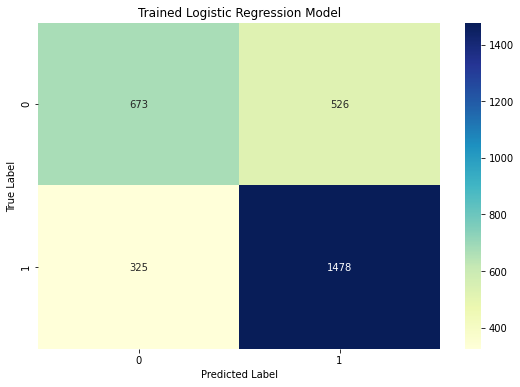

In [29]:
#Logistic regression model performance over testing data.
y_pred_logistic = logisticReg.predict(X_test)

# Model Accuracy: How well the model predicts over the training data?
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_logistic))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision: ", metrics.precision_score(y_test, y_pred_logistic))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall: ", metrics.recall_score(y_test, y_pred_logistic))

# Model F1-Score
print("F1-Score: ", metrics.f1_score(y_test, y_pred_logistic))

# Model Confusion Matrix
tn_model, fp_model, fn_model, tp_model = confusion_matrix(y_test,y_pred_logistic).ravel()
print("\nCONFUSION MATRIX VALUES :")
print("Logistic Regression Model True Positive :", tp_model)
print("Logistic Regression Model False Negative :",fn_model)
print("Logistic Regression Model True Negative :", tn_model)
print("Logistic Regression Model False Positive :",fp_model,"\n")

CM = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(9,6))
cm_matrix = pd.DataFrame(data = CM, columns=[0, 1], 
                                 index=[0, 1])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Trained Logistic Regression Model')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# SVM Model using Cross-validation.

C Value : 0.001
SVM MODEL MEAN ACCURACY FOR C Value=0 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.5906546016595222
MEAN OF THE F1-SCORES : 0.7464439641641367
STANDARD DEVIATION OF F1-SCORE : 9.738977939384162e-05 

C Value : 0.01
SVM MODEL MEAN ACCURACY FOR C Value=0 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.7168313508006136
MEAN OF THE F1-SCORES : 0.7928618506131454
STANDARD DEVIATION OF F1-SCORE : 0.0035006797785057074 

C Value : 0.1
SVM MODEL MEAN ACCURACY FOR C Value=0 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.7300734394252187
MEAN OF THE F1-SCORES : 0.7960264564480989
STANDARD DEVIATION OF F1-SCORE : 0.004411673516675801 

C Value : 1
SVM MODEL MEAN ACCURACY FOR C Value=1 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.7364029558874476
MEAN OF THE F1-SCORES : 0.7966702378578845
STANDARD DEVIATION OF F1-SCORE : 0.005389149820084536 

C Value : 10
SVM MODEL MEAN ACCURACY FOR C Value=10 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.7394845195295

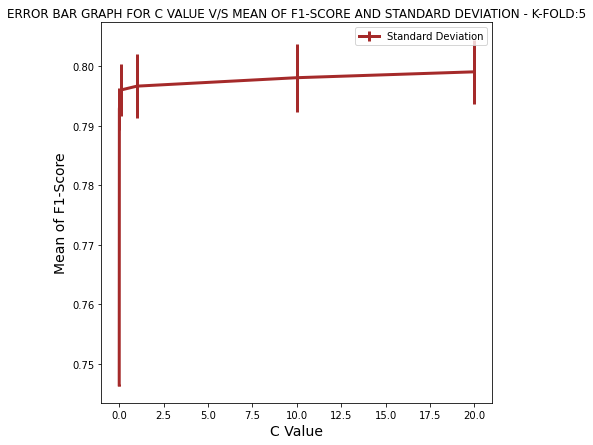

In [30]:
warnings.filterwarnings("ignore")
C_array = [0.001,0.01,0.1,1,10,20]
f1_score=[]
std_error=[]
mean_accuracy = []
for C_value in C_array:
    kfold_n = 5
    kfold = KFold(n_splits=kfold_n)
    svmModel = svm.SVC(C = C_value, kernel = "rbf")
    temp=[]
    temp_acc = []
    for train, test in kfold.split(X_train):
        svmModel.fit(X_train[train], y_train[train])
        ypred = svmModel.predict(X_train[test])
        temp_acc.append(accuracy_score(y_train[test],ypred))
        ypred = svmModel.predict(X_train)
    mean_accuracy.append(np.array(temp_acc).mean())
    scores = cross_val_score(svmModel,X_train[train],y_train[train], cv=5, scoring='f1')
    f1_score.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())
    print("C Value :",C_value)
    print("SVM MODEL MEAN ACCURACY FOR C Value=%d USING 10-FOLD CROSSVALIDATION OVER TESTING DATA: "%C_value,mean_accuracy[-1])
    print("MEAN OF THE F1-SCORES :",f1_score[-1])
    print("STANDARD DEVIATION OF F1-SCORE :",std_error[-1],"\n")
plt.figure(figsize=(7,7))
plt.errorbar(C_array,f1_score,yerr=std_error,linewidth=3, color = "brown")
plt.xlabel('C Value', fontsize = 14)
plt.ylabel('Mean of F1-Score', fontsize = 14)
plt.title("ERROR BAR GRAPH FOR C VALUE V/S MEAN OF F1-SCORE AND STANDARD DEVIATION - K-FOLD:%s"%str(kfold_n))
plt.legend(["Standard Deviation"], bbox_to_anchor=(1, 1))
plt.show()

In [31]:
#Chosen model with best suited C value.
C_value = 10
svmModel = svm.SVC(C = C_value, kernel = "rbf")
svmModel.fit(X_train,y_train)
print("\n-------------------------------\nSVM MODEL TRAINED FOR C=%s.\n-------------------------------"%str(C_value))
SVMintercept_value = svmModel.intercept_
print("INTERCEPT VALUE :", SVMintercept_value[0])
print("SVM MODEL SCORE FOR  OVER TRAINING DATA FOR C=%s :"%str(C_value),svmModel.score(X_train,y_train))


-------------------------------
SVM MODEL TRAINED FOR C=10.
-------------------------------
INTERCEPT VALUE : -0.2526647695119229
SVM MODEL SCORE FOR  OVER TRAINING DATA FOR C=10 : 0.7440659615224452


Accuracy:  0.7361758827448368
Precision:  0.7399145704793545
Recall:  0.8646699944536883
F1-Score:  0.7974424552429668
CONFUSION MATRIX VALUES :
SVM Model True Positive : 1559
SVM Model False Negative : 244
SVM Model True Negative : 651
SVM Model False Positive : 548 



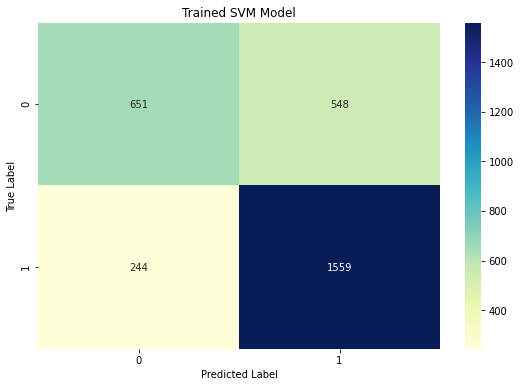

In [32]:
#SVM model performance over testing data.
y_pred_svm = svmModel.predict(X_test)

# Model Accuracy: How well the model predicts over the training data?
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_svm))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision: ", metrics.precision_score(y_test, y_pred_svm))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall: ", metrics.recall_score(y_test, y_pred_svm))

# Model F1-Score
print("F1-Score: ", metrics.f1_score(y_test, y_pred_svm))

# Model Confusion Matrix
tn_model, fp_model, fn_model, tp_model = confusion_matrix(y_test,y_pred_svm ).ravel()
print("CONFUSION MATRIX VALUES :")
print("SVM Model True Positive :", tp_model)
print("SVM Model False Negative :",fn_model)
print("SVM Model True Negative :", tn_model)
print("SVM Model False Positive :",fp_model,"\n")
#confusion_matrix(svmModel, X_test, y_test)
#plt.show()

CM = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(9,6))
cm_matrix = pd.DataFrame(data = CM, columns=[0, 1], 
                                 index=[0, 1])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Trained SVM Model')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# kNN model using cross validation.

n Value : 1
kNN MODEL MEAN ACCURACY FOR n VALUE=1 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.6529517762975299
MEAN OF THE F1-SCORES : 0.7089969205485012
STANDARD DEVIATION OF F1-SCORE : 0.006568131716705603 

n Value : 2
kNN MODEL MEAN ACCURACY FOR n VALUE=2 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.6249698168193174
MEAN OF THE F1-SCORES : 0.6310982524647132
STANDARD DEVIATION OF F1-SCORE : 0.01227774460499218 

n Value : 3
kNN MODEL MEAN ACCURACY FOR n VALUE=3 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.6867663058562309
MEAN OF THE F1-SCORES : 0.7409550909016019
STANDARD DEVIATION OF F1-SCORE : 0.00806995935762072 

n Value : 4
kNN MODEL MEAN ACCURACY FOR n VALUE=4 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.6735260199833472
MEAN OF THE F1-SCORES : 0.7043617680746003
STANDARD DEVIATION OF F1-SCORE : 0.011897161396770536 

n Value : 5
kNN MODEL MEAN ACCURACY FOR n VALUE=5 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.6955949902858729
MEAN OF THE

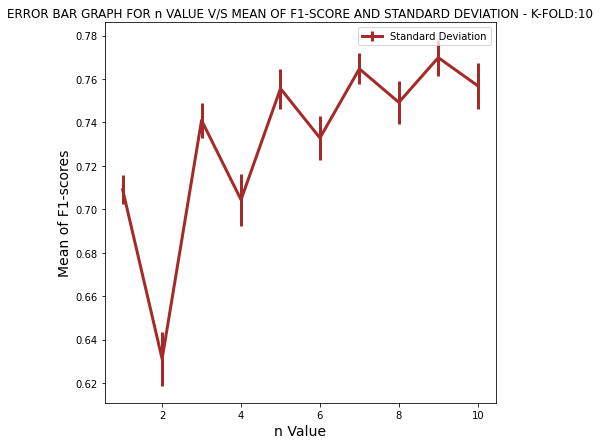

In [33]:
neigh_arr = [1,2,3,4,5,6,7,8,9,10]
f1_score=[]
std_error=[]
mean_accuracy = []
for neigh_size in neigh_arr:
    kfold_n = 10
    kfold = KFold(n_splits=kfold_n)
    kNNmodel = KNeighborsClassifier(n_neighbors=neigh_size)
    temp=[]
    temp_acc = []
    for train, test in kfold.split(X_train):
        kNNmodel.fit(X_train[train], y_train[train])
        ypred = kNNmodel.predict(X_train[test])
        temp_acc.append(accuracy_score(y_train[test],ypred))
        ypred = kNNmodel.predict(X_train)
    mean_accuracy.append(np.array(temp_acc).mean())
    scores = cross_val_score(kNNmodel,X_train[train],y_train[train], cv=5, scoring='f1')
    f1_score.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())
    print("n Value :",neigh_size)
    print("kNN MODEL MEAN ACCURACY FOR n VALUE=%d USING 10-FOLD CROSSVALIDATION OVER TESTING DATA: "%neigh_size,mean_accuracy[-1])
    print("MEAN OF THE F1-SCORES :",f1_score[-1])
    print("STANDARD DEVIATION OF F1-SCORE :",std_error[-1],"\n")

plt.figure(figsize=(7,7))
plt.errorbar(neigh_arr,f1_score,yerr=std_error,linewidth=3, color = "brown")
plt.xlabel('n Value', fontsize = 14)
plt.ylabel('Mean of F1-scores', fontsize = 14)
plt.title("ERROR BAR GRAPH FOR n VALUE V/S MEAN OF F1-SCORE AND STANDARD DEVIATION - K-FOLD:%s"%str(kfold_n))
plt.legend(["Standard Deviation"], bbox_to_anchor=(1, 1))
plt.show()

In [34]:
kNNmodel = KNeighborsClassifier(n_neighbors=4)
kNNmodel.fit(X_train, y_train)
print("-----------------------------\nkNN CLASSIFIER MODEL TRAINED.\n-----------------------------")
y_pred_kNN = kNNmodel.predict(X_train)
kNN_accuracy = accuracy_score(y_train,y_pred_kNN)
print("kNN MODEL ACCURACY OVER TRAINING DATA : ",kNN_accuracy)

-----------------------------
kNN CLASSIFIER MODEL TRAINED.
-----------------------------
kNN MODEL ACCURACY OVER TRAINING DATA :  0.7943699508619971


Accuracy:  0.673217854763491
Precision:  0.7637997432605905
Recall:  0.6600110926234054
F1-Score:  0.7081225825647129

CONFUSION MATRIX VALUES :
kNN Model True Positive : 1190
kNN Model False Negative : 613
kNN Model True Negative : 831
kNN Model False Positive : 368 



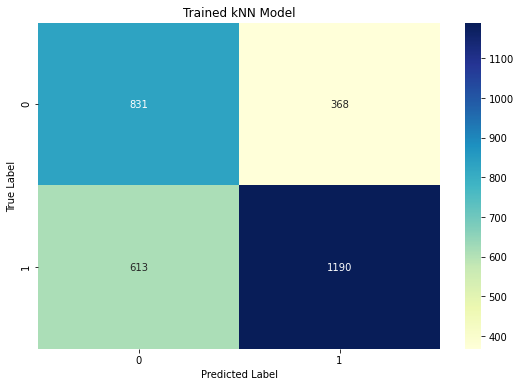

In [35]:
#kNN model performance over testing data.
y_pred_kNN = kNNmodel.predict(X_test)

# Model Accuracy: How well the model predicts over the training data?
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_kNN))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision: ", metrics.precision_score(y_test, y_pred_kNN))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall: ", metrics.recall_score(y_test, y_pred_kNN))

# Model F1-Score
print("F1-Score: ", metrics.f1_score(y_test, y_pred_kNN))

# Model Confusion Matrix
tn_model, fp_model, fn_model, tp_model = confusion_matrix(y_test,y_pred_kNN).ravel()
print("\nCONFUSION MATRIX VALUES :")
print("kNN Model True Positive :", tp_model)
print("kNN Model False Negative :",fn_model)
print("kNN Model True Negative :", tn_model)
print("kNN Model False Positive :",fp_model,"\n")

CM = confusion_matrix(y_test, y_pred_kNN)
plt.figure(figsize=(9,6))
cm_matrix = pd.DataFrame(data = CM, columns=[0, 1], 
                                 index=[0, 1])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Trained kNN Model')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Ridge Classifier Model

C Value : 0.001
RIDGE CLASSIFIER MODEL MEAN ACCURACY FOR C Value=0 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.7069208257314379
MEAN OF THE F1-SCORES : 0.7898249238655997
STANDARD DEVIATION OF F1-SCORE : 0.0027793280116498943 

C Value : 0.01
RIDGE CLASSIFIER MODEL MEAN ACCURACY FOR C Value=0 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.7202456234409684
MEAN OF THE F1-SCORES : 0.7852150689492954
STANDARD DEVIATION OF F1-SCORE : 0.006560918753259674 

C Value : 0.1
RIDGE CLASSIFIER MODEL MEAN ACCURACY FOR C Value=0 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.723327637908296
MEAN OF THE F1-SCORES : 0.785005667900797
STANDARD DEVIATION OF F1-SCORE : 0.005803118206603474 

C Value : 1
RIDGE CLASSIFIER MODEL MEAN ACCURACY FOR C Value=1 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.7249099996844224
MEAN OF THE F1-SCORES : 0.7839400228352171
STANDARD DEVIATION OF F1-SCORE : 0.005041659521639419 

C Value : 10
RIDGE CLASSIFIER MODEL MEAN ACCURACY FOR C Value=10 USI

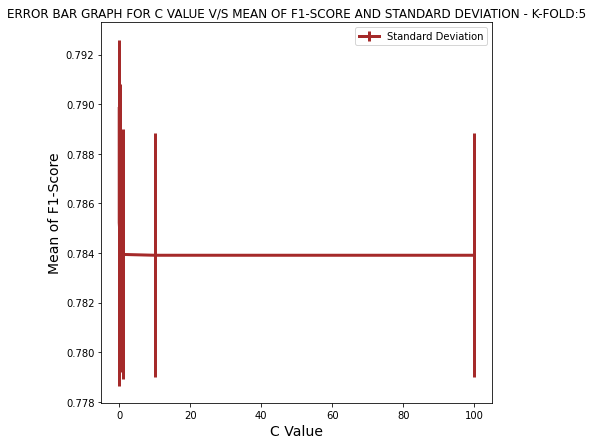

In [36]:
warnings.filterwarnings("ignore")
C_array = [0.001,0.01,0.1,1,10,100]
f1_score=[]
std_error=[]
mean_accuracy = []
for C_value in C_array:
    kfold_n = 5
    kfold = KFold(n_splits=kfold_n)
    ridge_model = RidgeClassifier(alpha = 1/(2*C_value))
    temp=[]
    temp_acc = []
    for train, test in kfold.split(X_train):
        ridge_model.fit(X_train[train], y_train[train])
        ypred = ridge_model.predict(X_train[test])
        temp_acc.append(accuracy_score(y_train[test],ypred))
        ypred = ridge_model.predict(X_train)
    mean_accuracy.append(np.array(temp_acc).mean())
    scores = cross_val_score(ridge_model,X_train[train],y_train[train], cv=5, scoring='f1')
    f1_score.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())
    print("C Value :",C_value)
    print("RIDGE CLASSIFIER MODEL MEAN ACCURACY FOR C Value=%d USING 10-FOLD CROSSVALIDATION OVER TESTING DATA: "%C_value,mean_accuracy[-1])
    print("MEAN OF THE F1-SCORES :",f1_score[-1])
    print("STANDARD DEVIATION OF F1-SCORE :",std_error[-1],"\n")
plt.figure(figsize=(7,7))
plt.errorbar(C_array,f1_score,yerr=std_error,linewidth=3, color = "brown")
plt.xlabel('C Value', fontsize = 14)
plt.ylabel('Mean of F1-Score', fontsize = 14)
plt.title("ERROR BAR GRAPH FOR C VALUE V/S MEAN OF F1-SCORE AND STANDARD DEVIATION - K-FOLD:%s"%str(kfold_n))
plt.legend(["Standard Deviation"], bbox_to_anchor=(1, 1))
plt.show()

In [37]:
C_value = 10
ridge_model = RidgeClassifier(alpha = 1/(2*C_value))
ridge_model.fit(X_train, y_train)
print("-----------------------------\nRIDGE CLASSIFIER MODEL TRAINED.\n-----------------------------")
y_pred_ridge = ridge_model.predict(X_train)
ridge_accuracy = accuracy_score(y_train,y_pred_ridge)
print("RIDGE CLASSIFIER MODEL ACCURACY OVER TRAINING DATA : ",ridge_accuracy)

-----------------------------
RIDGE CLASSIFIER MODEL TRAINED.
-----------------------------
RIDGE CLASSIFIER MODEL ACCURACY OVER TRAINING DATA :  0.7255767468976431


Accuracy:  0.7191872085276483
Precision:  0.7350636630754163
Recall:  0.8325013865779257
F1-Score:  0.7807542262678804

CONFUSION MATRIX VALUES :
kNN Model True Positive : 1501
kNN Model False Negative : 302
kNN Model True Negative : 658
kNN Model False Positive : 541 



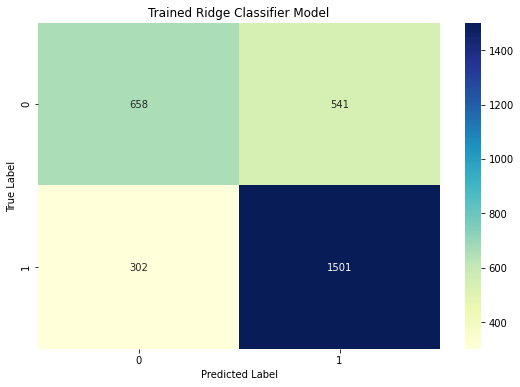

In [38]:
y_pred_ridge = ridge_model.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_ridge))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision: ", metrics.precision_score(y_test, y_pred_ridge))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall: ", metrics.recall_score(y_test, y_pred_ridge))

# Model F1-Score
print("F1-Score: ", metrics.f1_score(y_test, y_pred_ridge))

# Model Confusion Matrix
tn_model, fp_model, fn_model, tp_model = confusion_matrix(y_test,y_pred_ridge).ravel()
print("\nCONFUSION MATRIX VALUES :")
print("kNN Model True Positive :", tp_model)
print("kNN Model False Negative :",fn_model)
print("kNN Model True Negative :", tn_model)
print("kNN Model False Positive :",fp_model,"\n")
#confusion_matrix(ridge_model, X_test, y_test)
#plt.show()

CM = confusion_matrix(y_test, y_pred_ridge)
plt.figure(figsize=(9,6))
cm_matrix = pd.DataFrame(data = CM, columns=[0, 1], 
                                 index=[0, 1])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Trained Ridge Classifier Model')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [39]:
nnmodel = Sequential()
nnmodel.add(Dense(16, activation='relu', input_shape=(6,)))
nnmodel.add(Dense(16, activation='relu'))
nnmodel.add(Dense(16, activation='relu'))
nnmodel.add(Dropout(0.25))
#nnmodel.add(Flatten())
nnmodel.add(Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l1(0.0001)))

nnmodel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = nnmodel.fit(X_train,y_train,epochs=20, batch_size=64, validation_split=0.1)

y_pred_nn = (nnmodel.predict(X_train) > 0.5).astype("int32")

NN_accuracy = accuracy_score(y_train,y_pred_nn)
print("NEURAL NETWORK MODEL ACCURACY OVER TRAINING DATA : ",NN_accuracy)

Epoch 1/20
169/169 [==============================] - 2s 9ms/step - loss: 0.6673 - accuracy: 0.5843 - val_loss: 0.5738 - val_accuracy: 0.7127
Epoch 2/20
169/169 [==============================] - 0s 2ms/step - loss: 0.5703 - accuracy: 0.7061 - val_loss: 0.5516 - val_accuracy: 0.7219
Epoch 3/20
169/169 [==============================] - 0s 2ms/step - loss: 0.5624 - accuracy: 0.7165 - val_loss: 0.5505 - val_accuracy: 0.7202
Epoch 4/20
169/169 [==============================] - 0s 2ms/step - loss: 0.5535 - accuracy: 0.7281 - val_loss: 0.5478 - val_accuracy: 0.7211
Epoch 5/20
169/169 [==============================] - 0s 2ms/step - loss: 0.5492 - accuracy: 0.7250 - val_loss: 0.5435 - val_accuracy: 0.7186
Epoch 6/20
169/169 [==============================] - 0s 2ms/step - loss: 0.5477 - accuracy: 0.7296 - val_loss: 0.5406 - val_accuracy: 0.7236
Epoch 7/20
169/169 [==============================] - 0s 2ms/step - loss: 0.5481 - accuracy: 0.7263 - val_loss: 0.5423 - val_accuracy: 0.7219
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


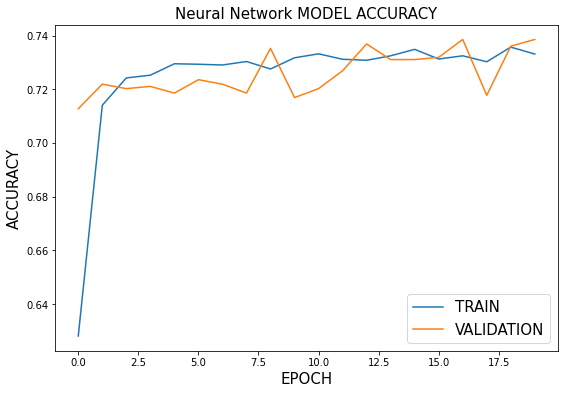

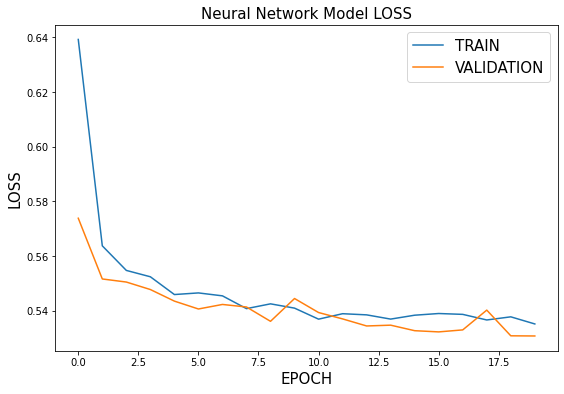

In [40]:
# list all data in history
print(history.history.keys())
 
plt.figure(figsize=(9,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Neural Network MODEL ACCURACY', fontsize = "15")
plt.ylabel('ACCURACY', fontsize = "15")
plt.xlabel('EPOCH', fontsize = "15")
plt.legend(['TRAIN', 'VALIDATION'], loc='lower right', fontsize = "15")
plt.show()
 
plt.figure(figsize=(9,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Neural Network Model LOSS', fontsize = "15")
plt.ylabel('LOSS', fontsize = "15")
plt.xlabel('EPOCH', fontsize = "15")
plt.legend(['TRAIN', 'VALIDATION'], loc='upper right', fontsize = "15")
plt.show()

Accuracy:  0.7211858760826116
Precision:  0.7335589941972921
Recall:  0.841375485302274
F1-Score:  0.7837768018599844

CONFUSION MATRIX VALUES :
Neural Network Model True Positive : 1517
Neural Network Model False Negative : 286
Neural Network Model True Negative : 648
Neural Network Model False Positive : 551 



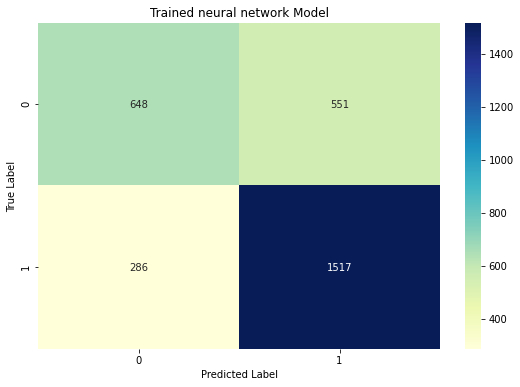

In [41]:
#kNN model performance over testing data.
y_pred_nn = nnmodel.predict_classes(X_test)

# Model Accuracy: How well the model predicts over the training data?
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_nn))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision: ", metrics.precision_score(y_test, y_pred_nn))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall: ", metrics.recall_score(y_test, y_pred_nn))

# Model F1-Score
print("F1-Score: ", metrics.f1_score(y_test, y_pred_nn))

# Model Confusion Matrix
tn_model, fp_model, fn_model, tp_model = confusion_matrix(y_test,y_pred_nn).ravel()
print("\nCONFUSION MATRIX VALUES :")
print("Neural Network Model True Positive :", tp_model)
print("Neural Network Model False Negative :",fn_model)
print("Neural Network Model True Negative :", tn_model)
print("Neural Network Model False Positive :",fp_model,"\n")
# confusion_matrix(nnmodel, X_test, y_test)
# plt.show()

CM = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(9,6))
cm_matrix = pd.DataFrame(data = CM, columns=[0, 1], 
                                 index=[0, 1])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Trained neural network Model')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

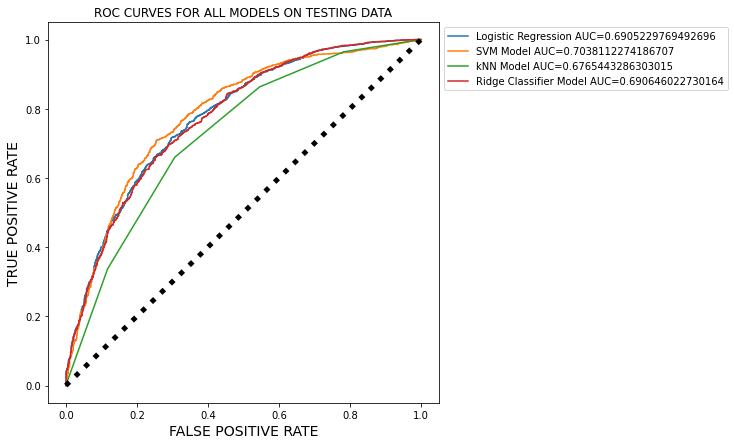

In [42]:
plt.figure(figsize=(7,7))
ax = plt.gca()
plt1 = plot_roc_curve(logisticReg, X_test, y_test, ax = ax)
plt2 = plot_roc_curve(svmModel, X_test, y_test,ax = ax)
plt3 = plot_roc_curve(kNNmodel, X_test, y_test, ax = ax)
plt4 = plot_roc_curve(ridge_model, X_test, y_test, ax = ax)

plt.plot([0,1], [0,1], color = "black",linestyle = "dotted", linewidth=5)

auc_logisticReg = roc_auc_score(y_test, y_pred_logistic)
auc_svm = roc_auc_score(y_test, y_pred_svm)
auc_kNN = roc_auc_score(y_test, y_pred_kNN)
auc_ridge = roc_auc_score(y_test, y_pred_ridge)
auc_nn = roc_auc_score(y_test, y_pred_nn)
auc_baseline = roc_auc_score(y_test, y_pred_baseline)

plt.title("ROC CURVES FOR ALL MODELS ON TESTING DATA", fontsize = "12")
plt.xlabel("FALSE POSITIVE RATE", fontsize = "14")
plt.ylabel("TRUE POSITIVE RATE", fontsize = "14")
plt.legend(["Logistic Regression AUC=%s"%str(auc_logisticReg),
            "SVM Model AUC=%s"%str(auc_svm),"kNN Model AUC=%s"%str(auc_kNN),
            "Ridge Classifier Model AUC=%s"%str(auc_ridge)],bbox_to_anchor=(1, 1))
plt.show()

# Testing simulation for next date

In [43]:
final_np_arr = []

AVG_MEAN_WINDSPEED_KNOT = (np.array(read_data["MEAN_WINDSPEED_KNOT"])).mean()
final_np_arr.append(AVG_MEAN_WINDSPEED_KNOT)
AVG_HIGHEST_10MIN_WINDSPEED = (np.array(read_data["HIGHEST_10MIN_WINDSPEED"])).mean()
final_np_arr.append(AVG_HIGHEST_10MIN_WINDSPEED)
AVG_WIND_DIR_DEGREE = (np.array(read_data["WIND_DIR_DEGREE"])).mean()
final_np_arr.append(AVG_WIND_DIR_DEGREE)
AVG_HIGHEST_GUST = (np.array(read_data["HIGHEST_GUST"])).mean()
final_np_arr.append(AVG_HIGHEST_GUST)
AVG_SUN_DURATION = (np.array(read_data["SUN_DURATION"])).mean()
final_np_arr.append(AVG_SUN_DURATION)
AVG_EVAPORATION = (np.array(read_data["EVAPORATION"])).mean()
final_np_arr.append(AVG_EVAPORATION)

final_np_arr = np.array(final_np_arr).reshape(1,-1)
print(final_np_arr)

[[0.28264864 0.30003709 0.56512644 0.29884151 0.24957604 0.26469869]]


In [44]:
y_pred_log = logisticReg.predict(final_np_arr)
print("PREDICTION OVER THE FOLLOWING DATE DATA USING LOGISTIC REGRESSION: %d"%y_pred_log)
y_pred_svm = svmModel.predict(final_np_arr)
print("PREDICTION OVER THE FOLLOWING DATE DATA USING SVM MODEL: %d"%y_pred_svm)
y_pred_kNN = kNNmodel.predict(final_np_arr)
print("PREDICTION OVER THE FOLLOWING DATE DATA USING kNN MODEL: %d"%y_pred_kNN)
y_pred_ridge = ridge_model.predict(final_np_arr)
print("PREDICTION OVER THE FOLLOWING DATE DATA USING RIDGE CLASSIFIER: %d"%y_pred_ridge)
y_pred_nn = nnmodel.predict_classes(final_np_arr)
print("PREDICTION OVER THE FOLLOWING DATE DATA USING NEURAL NETWORK MODEL: %d"%y_pred_nn[0])

PREDICTION OVER THE FOLLOWING DATE DATA USING LOGISTIC REGRESSION: 1
PREDICTION OVER THE FOLLOWING DATE DATA USING SVM MODEL: 1
PREDICTION OVER THE FOLLOWING DATE DATA USING kNN MODEL: 0
PREDICTION OVER THE FOLLOWING DATE DATA USING RIDGE CLASSIFIER: 1
PREDICTION OVER THE FOLLOWING DATE DATA USING NEURAL NETWORK MODEL: 1


In [45]:
end = time.time()
print(end - start)

364.8126058578491
